In [1]:
from qiskit.quantum_info import Statevector, SparsePauliOp, Operator, partial_trace, entropy, DensityMatrix

import itertools as it
import scipy.sparse.linalg as ssla
from scipy import sparse
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np

from utils import *
from dqpt import *
from spin_ham import *

The Hamiltonian: 
 SparsePauliOp(['IIIIXX', 'IIIXXI', 'IIXXII', 'IXXIII', 'XXIIII', 'IIIIYY', 'IIIYYI', 'IIYYII', 'IYYIII', 'YYIIII', 'IIIIZZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZZIIII', 'IIIIIX', 'IIIIXI', 'IIIXII', 'IIXIII', 'IXIIII', 'XIIIII'],
              coeffs=[-0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j,
 -0. +0.j, -0. +0.j, -0. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j,
 -1. +0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j])


Text(0.5, 0, 'Time')

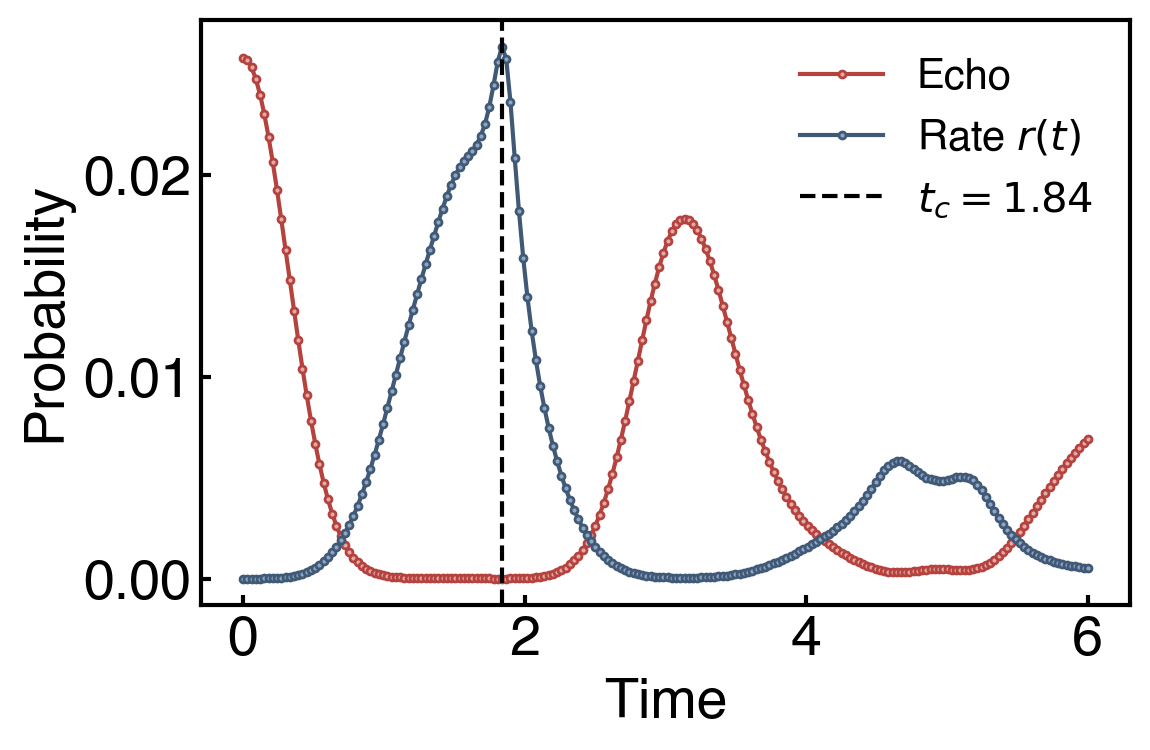

In [2]:
n = 6
r_pf = 50
t_max, t_n = 6.0, 200
t_list = np.linspace(0, t_max, t_n)

H = Heisenberg_1d(n, Jx=0.0, Jy=0.0, Jz=1.0, h=0.2, verbose=True).ham
init_state = Statevector.from_label('+'*n)
echo_list = []

for t in t_list:
    final_state = expm(-1j * t * H.to_matrix()) @ init_state.data
    echo = np.abs(init_state.data.conj() @ final_state)**2
    # print('echo: ', echo)
    echo_list.append(echo)
rate_list = [-np.log(echo)/n for echo in echo_list]

fig, ax= plt.subplots(1, 1, figsize=(6, 4), layout='tight', sharex=True, dpi=100)

plot_evo(ax, t_list, echo_list/sum(echo_list), '.-', ylabel='Percent', label='Echo')
plot_evo(ax, t_list, normalize(rate_list), '.-', ylabel='Probability', label=rf'Rate $r(t)$')
t_c = t_list[np.argmin(echo_list)]
ax.axvline(t_c, ls='--', color='k', label=f'$t_c = {t_c:.2f}$')

ax.legend() 
ax.set_xlabel('Time')